Cutom functions

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# function
def custom_function(x):
    return x**2 * (x**2-1)

In [14]:
# create x values
x = np.linspace(-1, 1, 400)

#create y values
y = custom_function(x)

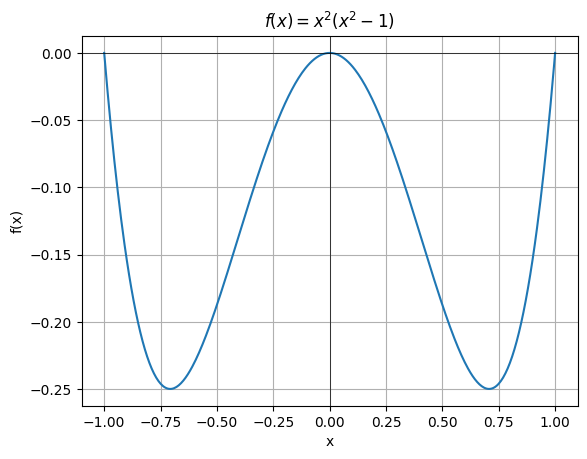

In [15]:
# Plot
plt.plot(x, y)
plt.title(r'$f(x) = x^2(x^2-1)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


#### Potential

In the context of MCMC, particularly Langevin and Hamiltonian methods, we define:
\begin{align*}
\text{U}(x) &= -\log p(x) \\
\text{p}(x) = e^{-\text{U}(x)}  \\
\text{Gradient}(x) &= \nabla \text{U}(x) = -\nabla \log p(x)
\end{align*}



In [16]:
def potential(x):
    return custom_function(x)

<module 'matplotlib.pyplot' from '/Users/h6x/anaconda3/envs/pytorch/lib/python3.11/site-packages/matplotlib/pyplot.py'>

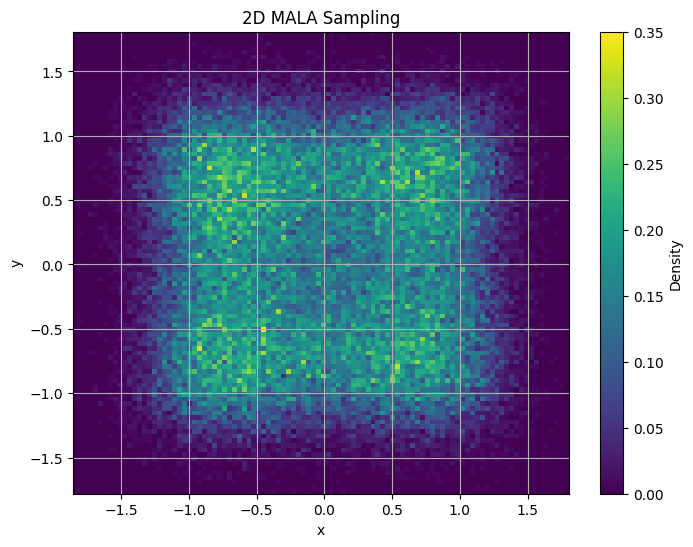

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 2D potential: U(x, y) = x^2(x^2 - 1) + y^2(y^2 - 1)
def potential(xy):
    x, y = xy
    return x**2 * (x**2 - 1) + y**2 * (y**2 - 1)

# Gradient of the potential
def grad_potential(xy):
    x, y = xy
    grad_x = 4*x**3 - 2*x
    grad_y = 4*y**3 - 2*y
    return np.array([grad_x, grad_y])

# 2D MALA Sampler
def mala_2d(potential, grad_potential, steps=10000, x0=(2.0, 2.0), epsilon=0.3):
    samples = []
    x = np.array(x0)

    for _ in range(steps):
        grad = grad_potential(x)
        mean_proposal = x - 0.5 * epsilon**2 * grad
        x_prop = mean_proposal + epsilon * np.random.randn(2)

        # Compute log acceptance ratio
        U_current = potential(x)
        U_proposed = potential(x_prop)

        log_q_current_given_prop = multivariate_normal.logpdf(x, mean=x_prop - 0.5 * epsilon**2 * grad_potential(x_prop), cov=epsilon**2 * np.eye(2))
        log_q_prop_given_current = multivariate_normal.logpdf(x_prop, mean=mean_proposal, cov=epsilon**2 * np.eye(2))

        log_accept_ratio = -U_proposed + U_current + log_q_current_given_prop - log_q_prop_given_current

        if np.log(np.random.rand()) < log_accept_ratio:
            x = x_prop

        samples.append(x.copy())

    return np.array(samples)

# Run the sampler
samples_2d = mala_2d(potential, grad_potential, steps=100000, x0=(2.0, 2.0), epsilon=0.3)

# Plotting samples
plt.figure(figsize=(8, 6))
plt.hist2d(samples_2d[:, 0], samples_2d[:, 1], bins=100, density=True, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D MALA Sampling')
plt.grid(True)
plt


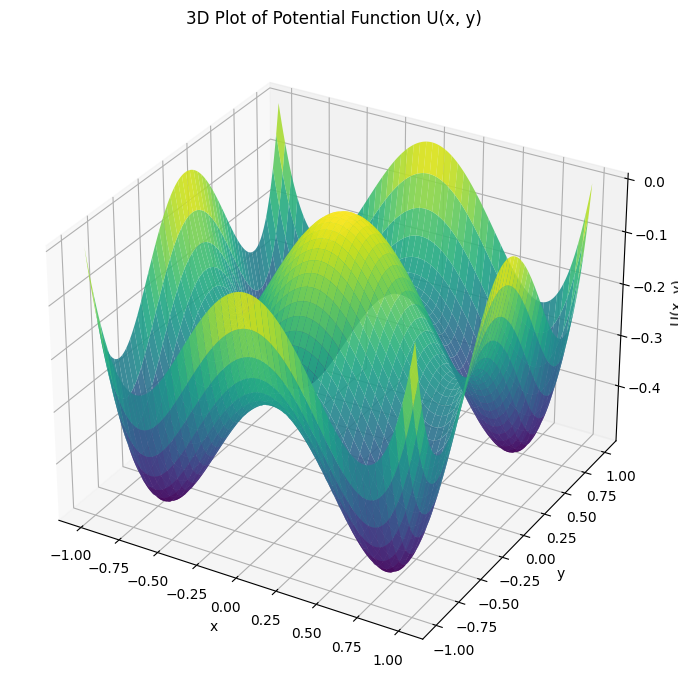

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

# Define the potential function U(x, y)
def potential(x, y):
    return x**2 * (x**2 - 1) + y**2 * (y**2 - 1)

# Create grid
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)
Z = potential(X, Y)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, edgecolor='none')

ax.set_title('3D Plot of Potential Function U(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U(x, y)')
plt.tight_layout()
plt.show()


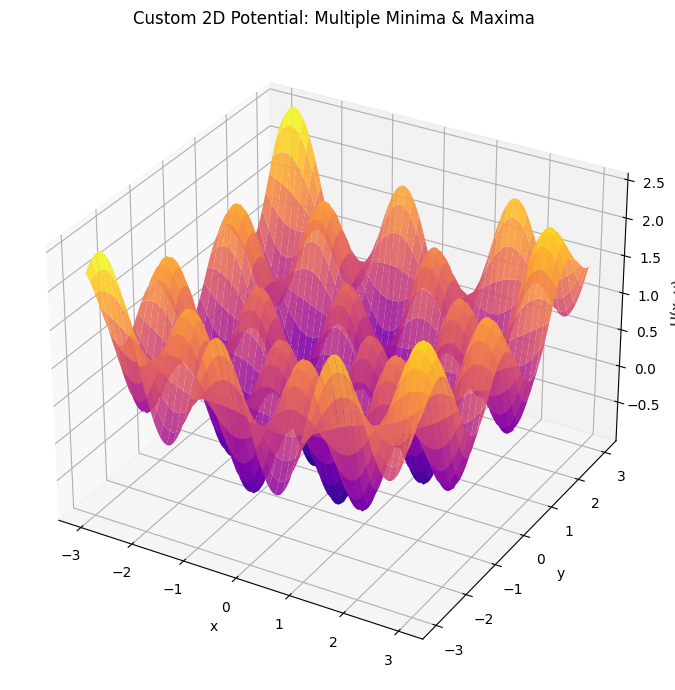

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Custom potential function with multiple min/max
def custom_potential(x, y):
    return np.sin(3 * x) * np.cos(3 * y) + 0.1 * (x**2 + y**2)

# Grid for plotting
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = custom_potential(X, Y)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none', alpha=0.9)

ax.set_title('Custom 2D Potential: Multiple Minima & Maxima')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U(x, y)')
plt.tight_layout()
plt.show()
